In [1]:
import os

from IPython.core.getipython import get_ipython

notebook_path = os.path.join(os.getcwd(), get_ipython().starting_dir)
project_root = os.path.dirname(os.path.dirname(notebook_path))
os.chdir(project_root)

In [2]:
from src.preprocessing.dataset_processor import DatasetProcessor

path = "/home/student/Repositories/lung-cancer-detection/LIDC-IDRI/CT/test/LIDC-IDRI-0001"

dp = DatasetProcessor(path)

In [3]:
output_path = "test"
dp.process_and_save(output_path)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:03<00:00,  1.76s/it]


In [4]:
import numpy as np

processed_path = "/home/student/Repositories/lung-cancer-detection/test/nodule/1.3.6.1.4.1.14519.5.2.1.6279.6001.297813206491522913194774892711.npy"
image = np.load(processed_path)

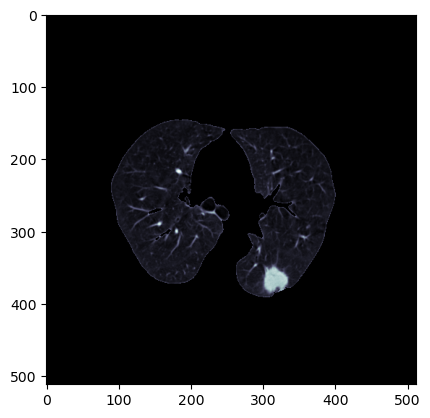

In [5]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap="bone")

In [6]:
import pydicom

dicom_path = "/home/student/Repositories/lung-cancer-detection/LIDC-IDRI/CT/test/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-043.dcm"

dicom = pydicom.dcmread(dicom_path)
print(f"uid: {dicom.SOPInstanceUID}\nslice: {dicom.SliceLocation}")

uid: 1.3.6.1.4.1.14519.5.2.1.6279.6001.297813206491522913194774892711
slice: -115.000000


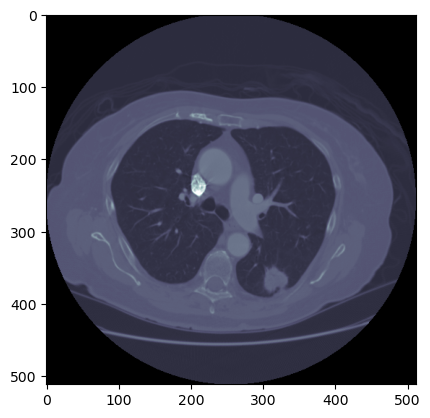

In [7]:
plt.imshow(dicom.pixel_array, cmap="bone")

In [8]:
from src.preprocessing.annotation_processor import AnnotationProcessor

annotation_path = "/home/student/Repositories/lung-cancer-detection/LIDC-IDRI/CT/test/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/069.xml"
ap = AnnotationProcessor(annotation_path)
ap.process()

In [9]:
nodules = [pa for pa in ap.data if pa.z_position == dicom.SliceLocation]

In [10]:
nodules

[ProcessedAnnotation(z_position=-115.0, x_positions=[314.0, 313.0, 312.0, 311.0, 310.0, 309.0, 309.0, 308.0, 307.0, 306.0, 305.0, 305.0, 305.0, 304.0, 303.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 302.0, 301.0, 301.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 299.0, 299.0, 300.0, 300.0, 301.0, 301.0, 302.0, 302.0, 303.0, 304.0, 305.0, 305.0, 306.0, 306.0, 306.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 316.0, 316.0, 317.0, 318.0, 319.0, 320.0, 321.0, 322.0, 323.0, 324.0, 325.0, 326.0, 327.0, 328.0, 329.0, 330.0, 331.0, 331.0, 331.0, 331.0, 331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 336.0, 337.0, 337.0, 337.0, 337.0, 337.0, 336.0, 335.0, 335.0, 334.0, 333.0, 333.0, 332.0, 331.0, 330.0, 329.0, 328.0, 327.0, 326.0, 325.0, 324.0, 323.0, 322.0, 322.0, 321.0, 320.0, 319.0, 318.0, 318.0, 317.0, 316.0, 315.0, 314.0, 314.0], y_positions=[347.0, 346.0, 347.0, 348.0, 349.0, 350.0, 35

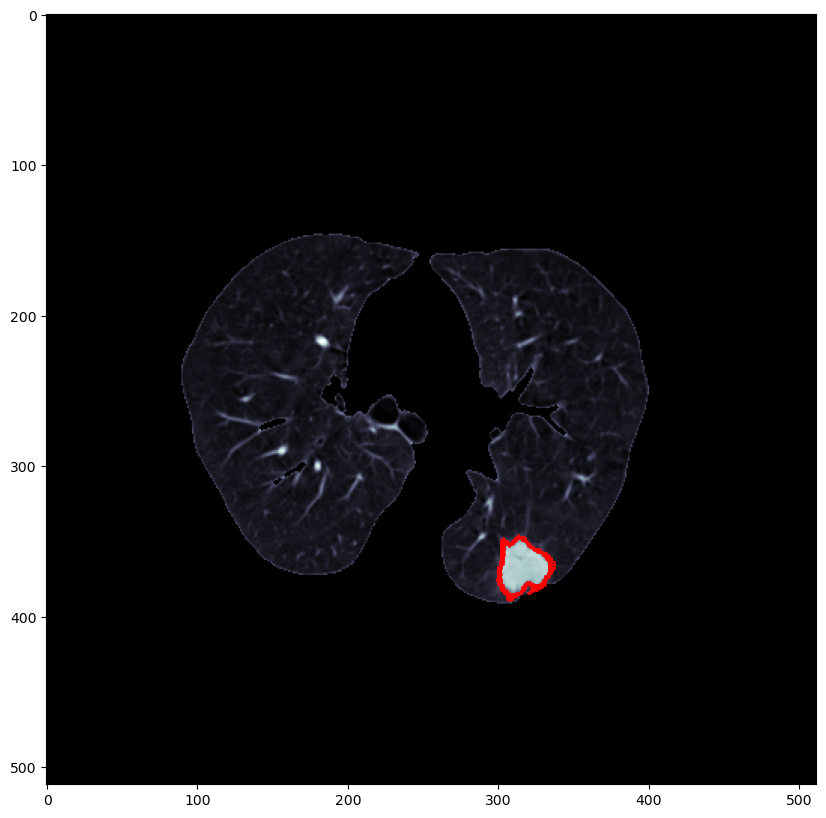

In [13]:
plt.figure(figsize=(10, 10))

plt.imshow(image, cmap="bone")

for nodule in nodules:
    plt.scatter(x=nodule.x_positions, y=nodule.y_positions, c='r', s=1)

plt.show()